In [1]:
import os
from google.colab import drive

import torch
import torch.nn as nn
from typing import List
import matplotlib.pyplot as plt
import numpy as np

# Set up device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


In [2]:
# import data

drive.mount('/content/drive')  # Simple mount point
os.chdir('/content/drive/My Drive/Deep Learning/BrainNet-Medical Imaging/src/config')

from data import data_setup, data_loader, display_sample

# import model

os.chdir('/content/drive/My Drive/Deep Learning/BrainNet-Medical Imaging/src/models')
from cnn import CNNModel

# import training methods

os.chdir('/content/drive/My Drive/Deep Learning/BrainNet-Medical Imaging/src/utils')
from training import train_epoch, validate, train_model, plot_training_history

# import prediction and evaluation methods

from prediction import predict_single_image, conf_matrix, summary

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Using device: cuda


100%|██████████| 6726/6726 [00:03<00:00, 1759.72it/s]


Unique files saved to: /tmp/unique_files/
Total files: 7023, Unique files: 6726
The following transformations are applied to the original images:
Converted to greyscale, Resized to 128x128 pixels, coverted to PyTorch tensors and pixel values normalized.
Total files in train set: 5521, with target values: ['glioma', 'meningioma', 'notumor', 'pituitary']
Total files in test set: 1205, with target values: ['glioma', 'meningioma', 'notumor', 'pituitary']


In [3]:
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

label_conversion_dict = {
            'glioma': 0,
            'meningioma': 1,
            'notumor': 2,
            'pituitary': 3,
            0: 'glioma',
            1: 'meningioma',
            2: 'notumor',
            3: 'pituitary'
        }

100%|██████████| 6726/6726 [00:03<00:00, 1916.62it/s]


Unique files saved to: /tmp/unique_files/
Total files: 7023, Unique files: 6726
The following transformations are applied to the original images:
Converted to greyscale, Resized to 128x128 pixels, coverted to PyTorch tensors and pixel values normalized.
Total files in train set: 5521, with target values: ['glioma', 'meningioma', 'notumor', 'pituitary']
Total files in test set: 1205, with target values: ['glioma', 'meningioma', 'notumor', 'pituitary']


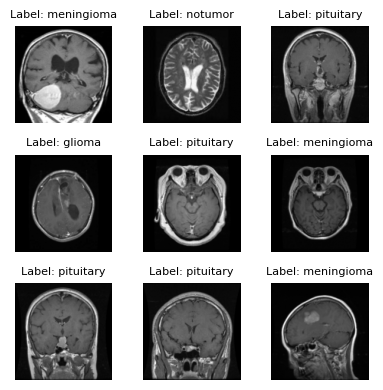

In [4]:
# Load data and data_loaders
train_set, test_set = data_setup()
train_loader, test_loader = data_loader(train_set, test_set)

# Display a sample of images from train_set
display_sample(train_set)

In [5]:
# Train the model
model_cnn = CNNModel()
history = train_model(
    model=model_cnn,
    train_loader=train_loader,
    val_loader=test_loader,
    num_epochs=40,
    device = torch.device('cuda')
)

Epoch: 0 Train Loss: 0.9047 Val Loss: 0.6827 Accuracy: 72.20%
Epoch: 1 Train Loss: 0.4927 Val Loss: 0.4747 Accuracy: 78.67%
Epoch: 2 Train Loss: 0.3458 Val Loss: 0.3508 Accuracy: 86.64%
Epoch: 3 Train Loss: 0.2495 Val Loss: 0.3164 Accuracy: 88.63%
Epoch: 4 Train Loss: 0.1738 Val Loss: 0.2254 Accuracy: 91.87%
Epoch: 5 Train Loss: 0.1118 Val Loss: 0.1772 Accuracy: 93.28%
Epoch: 6 Train Loss: 0.0763 Val Loss: 0.1440 Accuracy: 95.68%
Epoch: 7 Train Loss: 0.0613 Val Loss: 0.2704 Accuracy: 93.03%
Epoch: 8 Train Loss: 0.0686 Val Loss: 0.1427 Accuracy: 95.52%
Epoch: 9 Train Loss: 0.0560 Val Loss: 0.1261 Accuracy: 95.19%
Epoch: 10 Train Loss: 0.0230 Val Loss: 0.1537 Accuracy: 95.60%
Epoch: 11 Train Loss: 0.0096 Val Loss: 0.1321 Accuracy: 96.85%
Epoch: 12 Train Loss: 0.0600 Val Loss: 0.1959 Accuracy: 92.70%
Epoch: 13 Train Loss: 0.0260 Val Loss: 0.1953 Accuracy: 95.60%
Epoch: 14 Train Loss: 0.0215 Val Loss: 0.1326 Accuracy: 96.51%
Epoch: 15 Train Loss: 0.0222 Val Loss: 0.2002 Accuracy: 95.85%
Ep

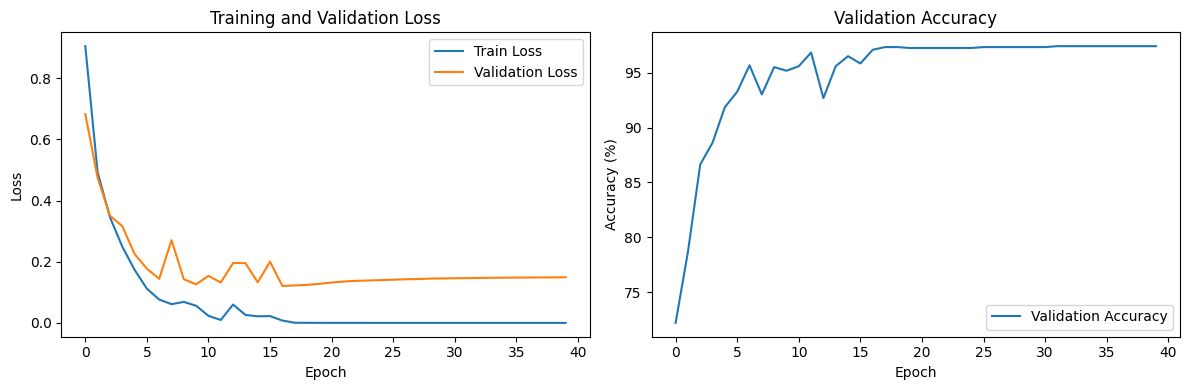

In [10]:
# Plot training history

plot_training_history(history)

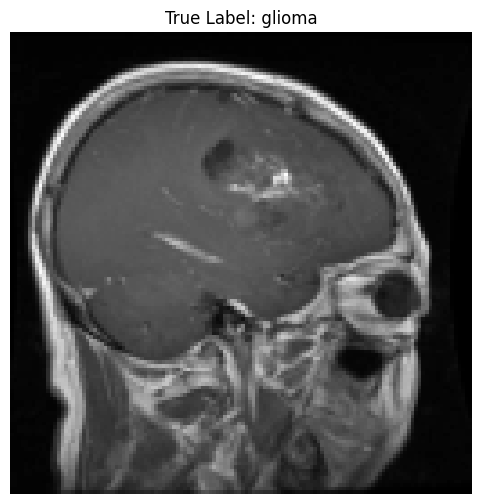

Predicted Class: glioma


'glioma'

In [11]:
predict_single_image(model_cnn, test_set, label_conversion_dict, device=device)

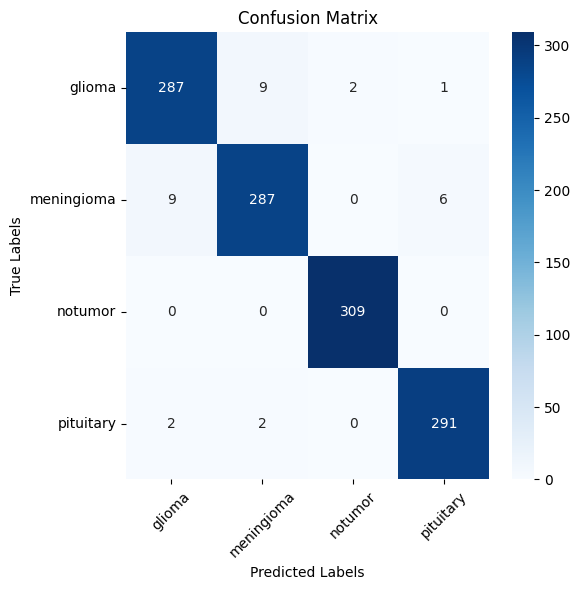

In [12]:
confusion_matrix = conf_matrix(model_cnn, test_set)

In [13]:
summary(confusion_matrix)

Summary: 

We have 

96.31% accuracy rate for predicting glioma.
If glioma is predicted, the true class of the predicted image could be:
meningioma with 3.02% chance
notumor with 0.00% chance
pituitary with 0.67% chance


96.31% accuracy rate for predicting meningioma.
If meningioma is predicted, the true class of the predicted image could be:
glioma with 3.02% chance
notumor with 0.00% chance
pituitary with 0.67% chance


99.36% accuracy rate for predicting notumor.
If notumor is predicted, the true class of the predicted image could be:
glioma with 0.64% chance
meningioma with 0.00% chance
pituitary with 0.00% chance


97.65% accuracy rate for predicting pituitary.
If pituitary is predicted, the true class of the predicted image could be:
glioma with 0.34% chance
meningioma with 2.01% chance
notumor with 0.00% chance


